# **Đề bài: Dự đoán giá BTC**

# Data

In [216]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow as tf

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

In [217]:
btc_daily='https://drive.google.com/file/d/1bvS8CnyluXGZnu5KMgHCHxa0Y7KkoFNN/view?usp=sharing'

btc_price = pd.read_csv('https://drive.google.com/uc?export=download&id='+ btc_daily.split('/')[-2])




In [218]:
btc_price.head(5)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [219]:
btc_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


In [220]:
btc_price['date']=pd.to_datetime(btc_price['date'])

In [ ]:
#btc_price['unix'] = btc_price['unix'].apply(lambda x: datetime.utcfromtimestamp(x).strftime("%Y-%m-%d"))


In [ ]:
#btc_price['unix']=pd.to_datetime(btc_price['unix'])

In [221]:
btc_price.drop(['symbol'], axis=1, inplace=True)

In [224]:
btc_price = btc_price.sort_values(by='date')


In [225]:
btc_price.head()

,unix,date,open,high,low,close,Volume BTC,Volume USD
2650,1417132800,2014-11-28,363.59,381.34,360.57,376.28,3220878.18,8617.15
2649,1417219200,2014-11-29,376.42,386.60,372.25,376.72,2746157.05,7245.19
2648,1417305600,2014-11-30,376.57,381.99,373.32,373.34,1145566.61,3046.33
2647,1417392000,2014-12-01,376.40,382.31,373.03,378.39,2520662.37,6660.56
2646,1417478400,2014-12-02,378.39,382.86,375.23,379.25,2593576.46,6832.53


In [226]:
btc_price.tail(5)

,unix,date,open,high,low,close,Volume BTC,Volume USD
4,1645747200,2022-02-25,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07
3,1645833600,2022-02-26,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2,1645920000,2022-02-27,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
1,1646006400,2022-02-28,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
0,1646092800,2022-03-01,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06


In [227]:
btc_price[btc_price.duplicated(keep=False)]

,unix,date,open,high,low,close,Volume BTC,Volume USD


In [79]:
len(btc_price[(btc_price['Volume BTC'] == 0.0) & (btc_price['Volume USD'] == 0.0)]) / len(btc_price) * 100


0.3017729158807997

In [80]:
btc_price.isnull().sum()

unix          0
date          0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [228]:
btc_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2651 entries, 2650 to 0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unix        2651 non-null   int64         
 1   date        2651 non-null   datetime64[ns]
 2   open        2651 non-null   float64       
 3   high        2651 non-null   float64       
 4   low         2651 non-null   float64       
 5   close       2651 non-null   float64       
 6   Volume BTC  2651 non-null   float64       
 7   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 186.4 KB


In [55]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

<ipython-input-55-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-55-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-55-8c8257b32bab>:4: UserWarning: 

`distplot` is 

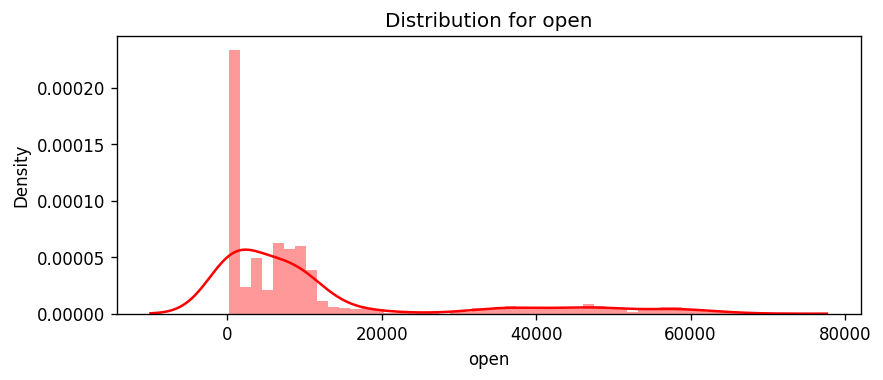

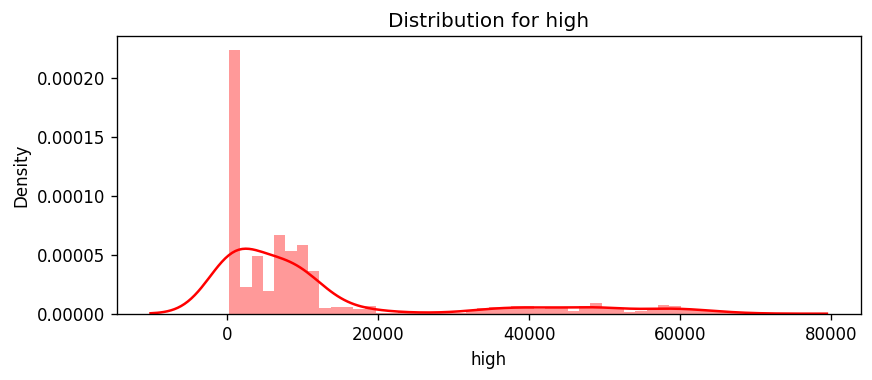

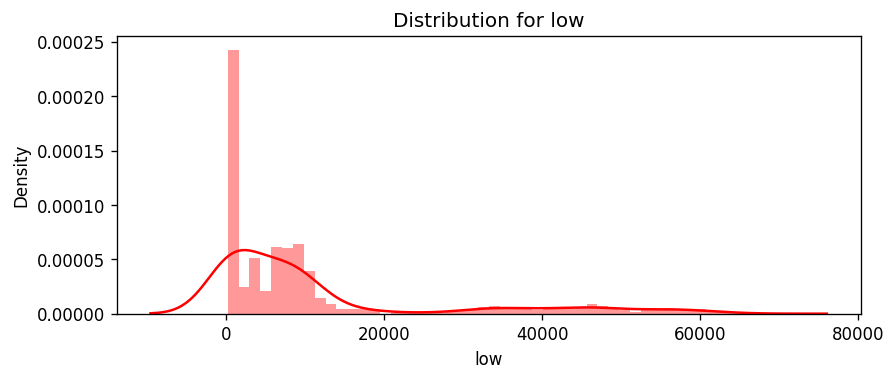

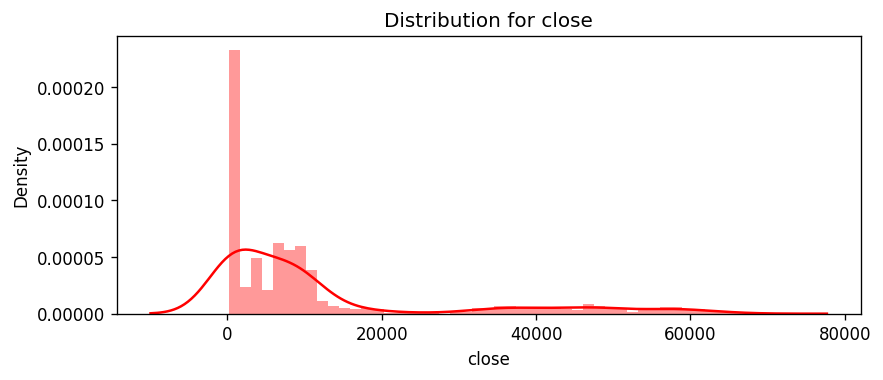

In [56]:
num_cols = ["open", 'high', 'low', 'close']
for feat in num_cols: distplot(feat, btc_price)

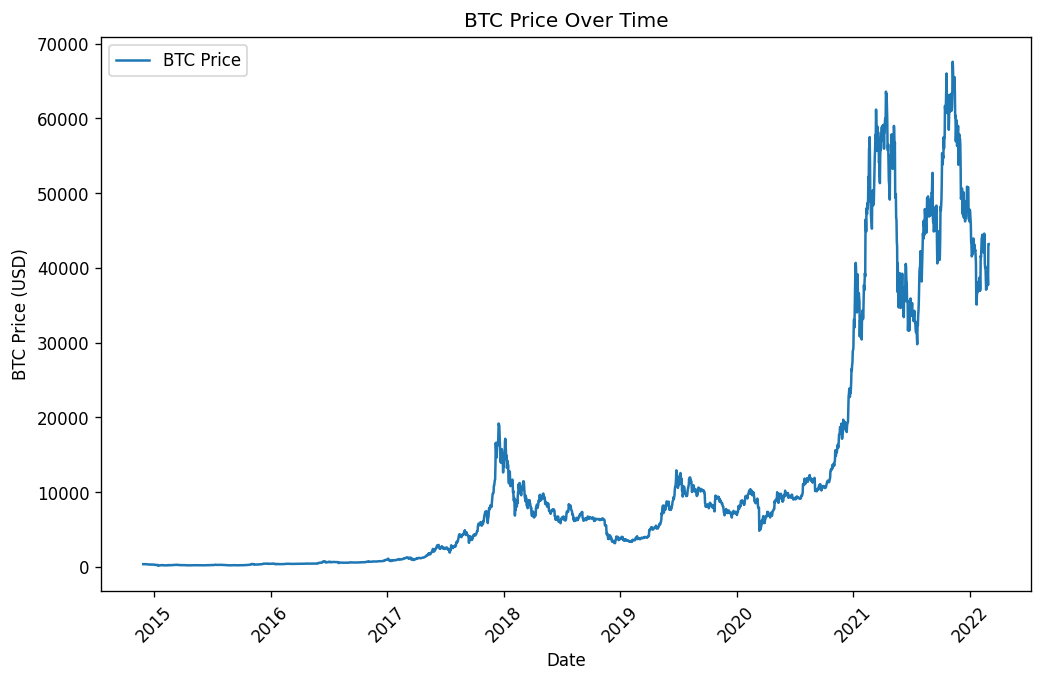

In [229]:
plt.figure(figsize=(10, 6))
plt.plot(btc_price['date'], btc_price['close'], label='BTC Price')
plt.title('BTC Price Over Time')
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [13]:
btc_price.groupby(btc_price['year'])['close'].max()

KeyError: ignored

In [21]:
btc_price.groupby(btc_price['year'])['close'].min()

year
2017      752.04
2018     3124.45
2019     3334.00
2020     3865.00
2021    28073.03
2022    33043.07
Name: close, dtype: float64

# MODEL

**ARIMA**

**LSTM**

Mô hình chưa thực sự tốt để dự báo giá.

In [83]:
btc_LSTM = btc_price.filter(['close'])
btc_LSTM= btc_LSTM.values
btc_LSTM

array([[  376.28],
       [  376.72],
       [  373.34],
       ...,
       [37712.68],
       [43178.98],
       [43185.48]])

In [84]:
training_data_len = int(np.ceil( len(btc_LSTM) * .80 ))
window_size = 60
training_data_len


2121

In [85]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(btc_LSTM)
print ('scaled_data.shape',len(scaled_data))

scaled_data.shape 2651


In [86]:
train_data = scaled_data[0:int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= window_size + 1:
        print('x_train',x_train)
        print('\ny_train',y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print ('x_train.shape:',x_train.shape)


x_train [array([-0.69614002, -0.69611299, -0.69632061, -0.69601041, -0.69595758,
       -0.69611606, -0.69682061, -0.69622171, -0.69621434, -0.69610377,
       -0.69685685, -0.69772418, -0.69786915, -0.69781694, -0.6974791 ,
       -0.69766522, -0.69774384, -0.69774384, -0.69898157, -0.69952948,
       -0.70007802, -0.6997199 , -0.69898341, -0.69940356, -0.69895085,
       -0.69864557, -0.6994656 , -0.69963452, -0.69892874, -0.69984951,
       -0.69980406, -0.69991769, -0.70009214, -0.69964312, -0.69982371,
       -0.69981143, -0.70168491, -0.70299881, -0.70225064, -0.70225064,
       -0.70225064, -0.70225064, -0.70225064, -0.70225064, -0.70225064,
       -0.70278136, -0.70567819, -0.70930231, -0.70642697, -0.70656272,
       -0.70696199, -0.70626665, -0.70593127, -0.70628754, -0.70521197,
       -0.70494109, -0.70493924, -0.70389746, -0.70370704, -0.70269905])]

y_train [-0.7030989304959409]

x_train [array([-0.69614002, -0.69611299, -0.69632061, -0.69601041, -0.69595758,
       -0.69

In [87]:
test_data = scaled_data[training_data_len-window_size:, :]

x_test = []
y_test = []

for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [88]:
def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(x_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)

    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)

    x = tf.keras.layers.Dense(25 , activation="relu", name ="dense_1")(x)

    output = tf.keras.layers.Dense(1, name="last_dense")(x)

    model = tf.keras.Model(inputs=input, outputs=output)

    return model

In [89]:
LSTM_model = build_LSTM_model()
LSTM_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_6 (Bidirecti  (None, 60, 256)           133120    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
 last_dense (Dense)          (None, 1)                 26        
                                                                 
Total params: 300723 (1.15 MB)
Trainable params: 300723 (1.

In [96]:
epochs = 10
batch_size = 64
early_stopping_patience = 17

LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

history = LSTM_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
33/33 [==============================] - 22s 399ms/step - loss: 6.1657e-04
Epoch 2/10
33/33 [==============================] - 14s 417ms/step - loss: 4.1392e-04
Epoch 3/10
33/33 [==============================] - 14s 416ms/step - loss: 3.9726e-04
Epoch 4/10
33/33 [==============================] - 14s 420ms/step - loss: 4.2969e-04
Epoch 5/10
33/33 [==============================] - 14s 413ms/step - loss: 4.0487e-04
Epoch 6/10
33/33 [==============================] - 14s 413ms/step - loss: 4.0055e-04
Epoch 7/10
33/33 [==============================] - 14s 416ms/step - loss: 4.0159e-04
Epoch 8/10
33/33 [==============================] - 14s 413ms/step - loss: 4.1603e-04
Epoch 9/10
33/33 [==============================] - 14s 418ms/step - loss: 4.1654e-04
Epoch 10/10
33/33 [==============================] - 14s 415ms/step - loss: 4.6939e-04


dict_keys(['loss'])


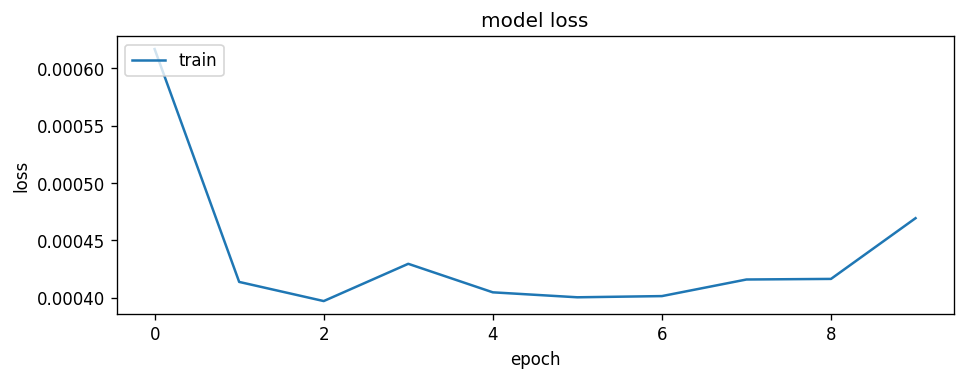

In [97]:
print(history.history.keys())
fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [98]:
predictions = LSTM_model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 3s 105ms/step


<ipython-input-99-8689b5ba9381>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


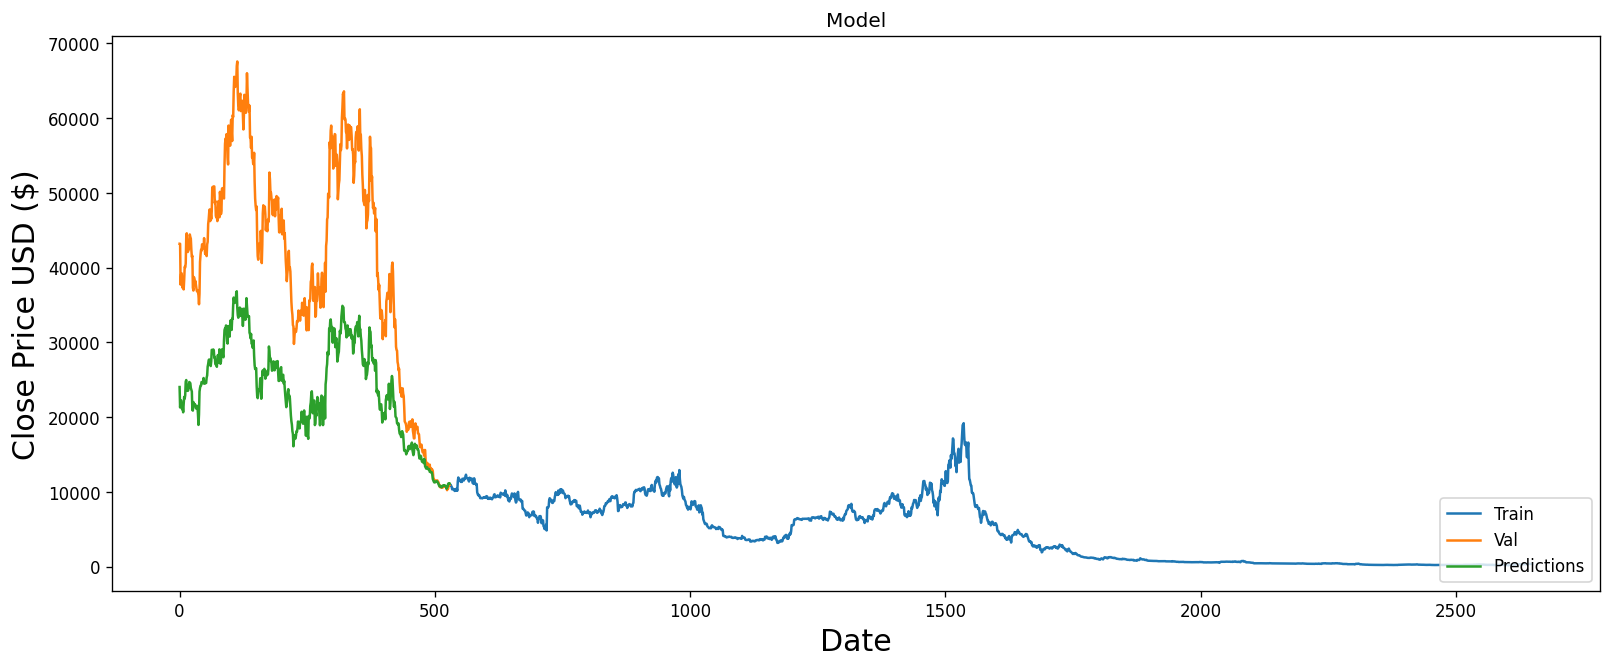

In [99]:
btc_price = btc_price.sort_values(by='date')
# Plot the data
train = btc_price[:training_data_len]
valid = btc_price[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(btc_price.index[:2121],train['close'])#We use index bc we set the date to our index
plt.plot(btc_price.index[2121:],valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [28]:
test_df = predict_and_inverse_transform(btc_price, x_test, LSTM1, scaler)

NameError: ignored

In [91]:
trainPredict = LSTM_model.predict(x_train)
trainPredict

65/65 [==============================] - 7s 106ms/step


array([[ 2.27863   ],
       [ 2.2492692 ],
       [ 2.2634673 ],
       ...,
       [-0.7408245 ],
       [-0.74090064],
       [-0.74084836]], dtype=float32)

In [92]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])

In [93]:
trainY

array([[46214.37, 47150.71, 46483.36, ...,   441.63,   452.94,   453.01]])

**Linear Regression**

Mô hình này dự báo giá close của BTC dựa vào khối lượng giao dịch và biến động giá BTC theo ngày. Tuy nhiên, đánh giá dự báo rất thấp là 0.01 nên kha nang không dự báo chính xác được giá BTC. Có thể cân nhắc dùng thêm các biến khác.

In [ ]:
btc_price['year'] = btc_price['date'].dt.year
btc_price['month'] = btc_price['date'].dt.month

In [ ]:
btc_price = btc_price.sort_values(by='date')
btc_price['MarketVolatility_20days'] = (btc_price['close'] - btc_price['close'].shift(20)) / btc_price['close'].shift(20) * 100



In [ ]:
X=btc_price[['Volume BTC', 'MarketVolatility_20days']]
y=btc_price.close

In [ ]:
model2=LinearRegression()

In [ ]:
model2.fit(X,y)

LinearRegression()

In [ ]:
print('a=',model2.coef_)
print('b=',model2.intercept_)

a= [-116.88523563 -202.00896301]
b= 17305.164699982008


In [ ]:
y_pred=model2.predict(X)

In [ ]:
Ac2=r2_score(btc_price.close, y_pred)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac2))

The accuracy of this model is:R-square= 0.01


**Logistic Regression**

In [ ]:
Đánh giá dự báo rất thấp là 0.02 nên khả năng không dự báo chính xác được giá BTC.

In [ ]:
X=btc_price[['Volume BTC', 'MarketVolatility_20days']]
y=btc_price.close

In [ ]:
Poly_reg = PolynomialFeatures(degree=4)
X_poly = Poly_reg.fit_transform(X)

In [ ]:
model_Pol = LinearRegression()
model_Pol.fit(X_poly, y)

LinearRegression()

In [ ]:
model_Pol.coef_

array([ 0.00000000e+00, -3.40760031e+02, -4.55123045e+02,  2.20928229e+00,
        2.30409788e+01,  7.45713616e+02, -4.06763787e-03, -1.41367010e-01,
       -5.07111761e+00, -1.68091451e+01,  2.06065306e-06,  1.55964857e-04,
        8.09736224e-03,  1.02529233e-01, -2.79553173e-01])

In [ ]:
model_Pol.intercept_

18036.650787688654

In [ ]:
y_pred_Pol= model_Pol.predict(X_poly)

In [ ]:
Ac=r2_score(y, y_pred_Pol)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac))

The accuracy of this model is:R-square= 0.02


**ARIMA**

Khi huấn luyện mô hình arima trên tệp dữ liệu lớn thời gian chạy lâu nên có khả năng đây không phải là mô hình tối ưu để dự báo giá trên tập dữ liệu lớn.

In [230]:
predict_arima=btc_price[['date','close']]
predict_arima.set_index('date', inplace=True)

In [231]:
predict_arima

,close
date,
2014-11-28,376.28
2014-11-29,376.72
2014-11-30,373.34
2014-12-01,378.39
2014-12-02,379.25
...,...
2022-02-25,39231.64
2022-02-26,39146.66
2022-02-27,37712.68


In [232]:
X=predict_arima.values

In [233]:
X

array([[  376.28],
       [  376.72],
       [  373.34],
       ...,
       [37712.68],
       [43178.98],
       [43185.48]])

In [234]:
size=int(len(X) * 0.7)
train, test=X[0:size], X[size:len(X)]

In [235]:
!pip install pmdarima

In [236]:
import pmdarima as pm

In [238]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='kpss',       # use kpss test to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      information_criterion='oob',
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26091.348, Time=2.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26096.352, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26097.555, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26097.550, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26094.683, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26091.983, Time=3.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26092.136, Time=2.45 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=26099.496, Time=1.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=26099.512, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26059.758, Time=9.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26057.168, Time=6.00 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26087.783, Time=2.67 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=26057.120, Time=4.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=26081.054, Time=1.62 sec
 ARIMA(5,1,2)(0,0,0

In [240]:
history = [i for i in train]
predictions = []
#Dự báo 1 bước thời gian
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,2)) #cài đặt p(AR), d(I), q(MA)
	model_fit = model.fit()
	output = model_fit.forecast()# Dự báo cho t+1
	y_pred = output[0] # Giá trị dự báo t+1
	predictions.append(y_pred)
	obs = test[t]
	history.append(obs)
	print('Giá trị dự báo=%f, Giá trị thực tế=%f' % (y_pred, obs)) # Hiển thị giá trị dự báo của từng bước thời gian

mse=mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('MSE: %.2f' % mse)
print('RMSE: %.2f' % rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Giá trị dự báo=7213.658300, Giá trị thực tế=7246.000000
Giá trị dự báo=7249.746715, Giá trị thực tế=7296.240000
Giá trị dự báo=7278.632923, Giá trị thực tế=7385.540000
Giá trị dự báo=7416.445989, Giá trị thực tế=7220.240000
Giá trị dự báo=7184.444409, Giá trị thực tế=7168.360000
Giá trị dự báo=7187.503798, Giá trị thực tế=7178.680000
Giá trị dự báo=7166.993226, Giá trị thực tế=6950.560000
Giá trị dự báo=6949.898711, Giá trị thực tế=7338.910000
Giá trị dự báo=7358.112004, Giá trị thực tế=7344.480000
Giá trị dự báo=7326.472986, Giá trị thực tế=7356.700000
Giá trị dự báo=7391.632631, Giá trị thực tế=7762.740000
Giá trị dự báo=7725.416534, Giá trị thực tế=8159.010000
Giá trị dự báo=8221.236444, Giá trị thực tế=8044.440000
Giá trị dự báo=8007.167005, Giá trị thực tế=7806.780000
Giá trị dự báo=7792.268521, Giá trị thực tế=8200.000000
Giá trị dự báo=8234.040984, Giá trị thực tế=8016.220000
Giá trị dự báo=7984.989700, Giá trị thực tế=8180.760000
Giá trị dự báo=8222.398393, Giá trị thực tế=8105

KeyboardInterrupt: ignored

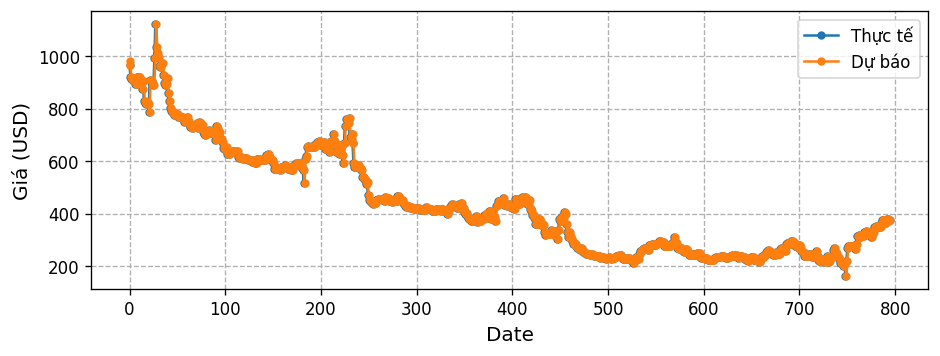

In [207]:
plt.plot(test,'.-', markersize=8)
plt.plot(predictions,'.-', markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Giá (USD)',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.legend(['Thực tế','Dự báo'])

In [242]:
train_size = int(len(X) * 0.7)
train, test = X[0:train_size], X[train_size:len(X)]
history = [i for i in train]
predictions = []
#Dự báo 11 bước thời gian
for t in range(11):
	model = ARIMA(history, order=(4,1,2)) #cài đặt p(AR), d(I), q(MA)
	model_fit = model.fit()
	output = model_fit.forecast()# Dự báo cho t+1
	y_pred = output[0] # Giá trị dự báo t+1
	predictions.append(y_pred)
	obs = test[t]
	history.append(obs)
	print('Giá trị dự báo=%f, Giá trị thực tế=%f' % (y_pred, obs)) # Hiển thị giá trị dự báo của từng bước thời gian

Giá trị dự báo=7213.658300, Giá trị thực tế=7246.000000
Giá trị dự báo=7249.746715, Giá trị thực tế=7296.240000
Giá trị dự báo=7278.632923, Giá trị thực tế=7385.540000
Giá trị dự báo=7416.445989, Giá trị thực tế=7220.240000
Giá trị dự báo=7184.444409, Giá trị thực tế=7168.360000
Giá trị dự báo=7187.503798, Giá trị thực tế=7178.680000
Giá trị dự báo=7166.993226, Giá trị thực tế=6950.560000
Giá trị dự báo=6949.898711, Giá trị thực tế=7338.910000
Giá trị dự báo=7358.112004, Giá trị thực tế=7344.480000
Giá trị dự báo=7326.472986, Giá trị thực tế=7356.700000
Giá trị dự báo=7391.632631, Giá trị thực tế=7762.740000


#

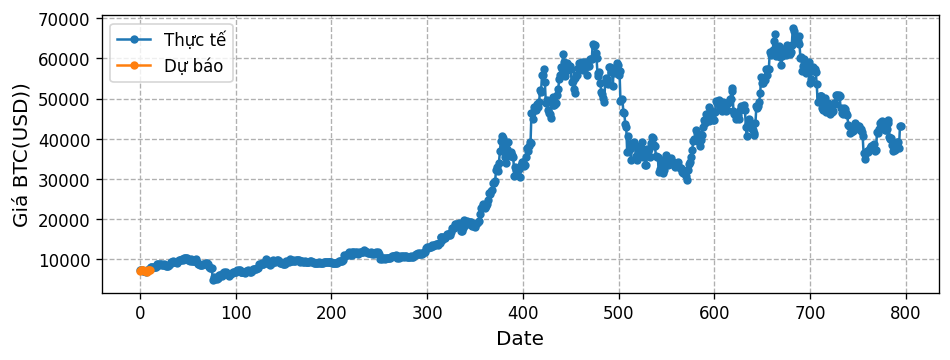

In [244]:
plt.plot(test,'.-', markersize=8)
plt.plot(predictions,'.-', markersize=8)
plt.grid(linestyle='--')
plt.ylabel('Giá BTC(USD))',fontsize=12)
plt.xlabel('Date',fontsize=12)
plt.legend(['Thực tế','Dự báo'])